In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_excel('Sales Data.xlsx')
df2 = pd.read_excel('Customer Feedback.xlsx')
df3 = pd.read_excel('Employee Performance.xlsx')
df4 = pd.read_excel('Product Inventory.xlsx')
df5 = pd.read_excel('Customer Demographics.xlsx')
df1

,OrderID,ProductID,Quantity,PricePerUnit,CustomerID,Region,OrderDate
0,1,1,2,10,1,Atyrau,2024-10-24
1,2,1,3,10,2,Aktau,2020-01-10
2,3,3,1,30,1,Atyrau,2021-04-13
3,4,4,3,40,4,Almaty,2019-03-25
4,5,5,4,50,5,Astana,1999-07-20
5,6,2,1,20,1,Atyrau,2010-09-21
6,7,5,2,50,2,Aktau,2010-02-05
7,8,7,5,70,5,Astana,2014-01-03
8,9,15,3,150,7,Oral,2016-12-05
9,10,12,2,120,9,Kokshetau,2020-09-08


# 1 exercise

In [3]:
groupedByRegion = df1.groupby(by=['Region'])
groupedByRegion.get_group('Oral')

,OrderID,ProductID,Quantity,PricePerUnit,CustomerID,Region,OrderDate
8,9,15,3,150,7,Oral,2016-12-05
13,14,7,2,70,7,Oral,2019-02-14
18,19,14,8,140,15,Oral,2000-02-19


In [4]:

t_statistics, p_value = stats.ttest_ind(groupedByRegion.get_group('Atyrau')['PricePerUnit'],groupedByRegion.get_group('Oral')['PricePerUnit'])
p_value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")

Fail to reject the null hypothesis: There is no significant difference between the means.


# 2 exercise

In [5]:
rating_prob_dist = df2['Rating'].value_counts(normalize=True).sort_index()
rating_prob_dist

1    0.15
2    0.05
3    0.20
4    0.30
5    0.30
Name: Rating, dtype: float64

# 3 exercise

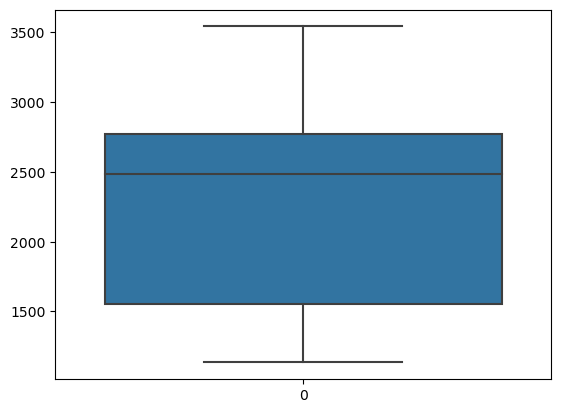

In [6]:
sns.boxplot(df3['Salary'])
plt.show()

In [7]:
grouped = df3.groupby('Department')

# Calculate the IQR for each department's salaries
iqr_per_department = grouped['Salary'].quantile(0.75) - grouped['Salary'].quantile(0.25)

# Display the IQR for each department
print("Interquartile Range (IQR) for Salaries in Each Department:")
print(iqr_per_department)

Interquartile Range (IQR) for Salaries in Each Department:
Department
Accounting            0.0
Customer Service    176.5
Finance             706.0
Human Resources     149.5
Marketing           763.0
Sales               214.5
Name: Salary, dtype: float64


# 4 exercise

In [8]:
combined_data = pd.merge(df1, df4, on='ProductID', how='inner')
combined_data['Total'] = combined_data['Quantity']*combined_data['PricePerUnit']
combined_data

,OrderID,ProductID,Quantity,PricePerUnit,CustomerID,Region,OrderDate,ProductName,StockQuantity,ReorderLevel,Total
0,1,1,2,10,1,Atyrau,2024-10-24,Pens,100,50,20
1,2,1,3,10,2,Aktau,2020-01-10,Pens,100,50,30
2,3,3,1,30,1,Atyrau,2021-04-13,Notebooks,124,50,30
3,4,4,3,40,4,Almaty,2019-03-25,Paper,200,100,120
4,5,5,4,50,5,Astana,1999-07-20,Rulers,132,100,200
5,7,5,2,50,2,Aktau,2010-02-05,Rulers,132,100,100
6,15,5,3,50,5,Astana,1999-03-19,Rulers,132,100,150
7,6,2,1,20,1,Atyrau,2010-09-21,Pencils,141,90,20
8,8,7,5,70,5,Astana,2014-01-03,Staplers,50,10,350
9,14,7,2,70,7,Oral,2019-02-14,Staplers,50,10,140


# 5 exercise

In [9]:
pivot_table = pd.pivot_table(combined_data, values='Total', index='CustomerID', columns='ProductID', aggfunc='sum')

pivot_table = pivot_table.fillna(0)

print(pivot_table)

ProductID     1     2     3      4      5      7      9       11     12  \
CustomerID                                                                
1           20.0  20.0  30.0    0.0    0.0    0.0    0.0     0.0    0.0   
2           30.0   0.0   0.0    0.0  100.0    0.0    0.0     0.0  840.0   
4            0.0   0.0   0.0  120.0    0.0    0.0   90.0     0.0    0.0   
5            0.0   0.0   0.0    0.0  350.0  350.0    0.0     0.0    0.0   
7            0.0   0.0   0.0    0.0    0.0  140.0    0.0     0.0    0.0   
8            0.0   0.0   0.0    0.0    0.0    0.0  450.0     0.0    0.0   
9            0.0   0.0   0.0    0.0    0.0    0.0    0.0     0.0  240.0   
12           0.0   0.0   0.0    0.0    0.0    0.0    0.0     0.0    0.0   
15           0.0   0.0   0.0    0.0    0.0    0.0    0.0     0.0    0.0   
16           0.0   0.0   0.0    0.0    0.0    0.0    0.0     0.0    0.0   
17           0.0   0.0   0.0    0.0    0.0    0.0    0.0  1320.0    0.0   

ProductID       14     1

In [147]:
average_income = df5.groupby(['Age', 'Gender'])['Income'].mean().reset_index()

print(average_income)

    Age Gender   Income
0    18      M   2685.0
1    19      M   2341.0
2    21      F   6825.0
3    21      M  67842.0
4    22      F   5718.0
5    23      M   1893.0
6    24      F   1983.0
7    24      M   5633.0
8    25      F   7623.0
9    25      M   2071.0
10   29      F  11316.5
11   30      F   3462.0
12   31      F   1893.0
13   31      M  12364.0
14   34      F   1078.0
15   36      M   1328.0
16   37      M   6146.0
17   38      M   2676.0


# 6 exercise

In [148]:
import random
import datetime

employee_ids = list(range(1, 21))

training_topics = ["Topic A", "Topic B", "Topic C", "Topic D", "Topic E"]
training_hours = [random.randint(1, 10) for _ in range(20)]

start_date = datetime.date(2021, 1, 1)
end_date = datetime.date(2023, 12, 31)
training_dates = [start_date + datetime.timedelta(days=random.randint(0, (end_date - start_date).days)) for _ in range(20)]

employee_training_df = pd.DataFrame({
    'EmployeeID': employee_ids,
    'TrainingTopic': [random.choice(training_topics) for _ in range(20)],
    'TrainingHours': training_hours,
    'TrainingDate': training_dates
})
combined_data = pd.merge(df3, employee_training_df, on='EmployeeID', how='left')
total_training_hours = combined_data.groupby('EmployeeID')['TrainingHours'].sum().reset_index()
total_training_hours = total_training_hours.sort_values(by='TrainingHours', ascending=False)

total_training_hours.head()


,EmployeeID,TrainingHours
16,17,10
4,5,10
0,1,9
14,15,9
7,8,7


# 7 exercise

In [149]:
df1['OrderDate'] = pd.to_datetime(df1['OrderDate'])
df1.set_index('OrderDate', inplace=True)

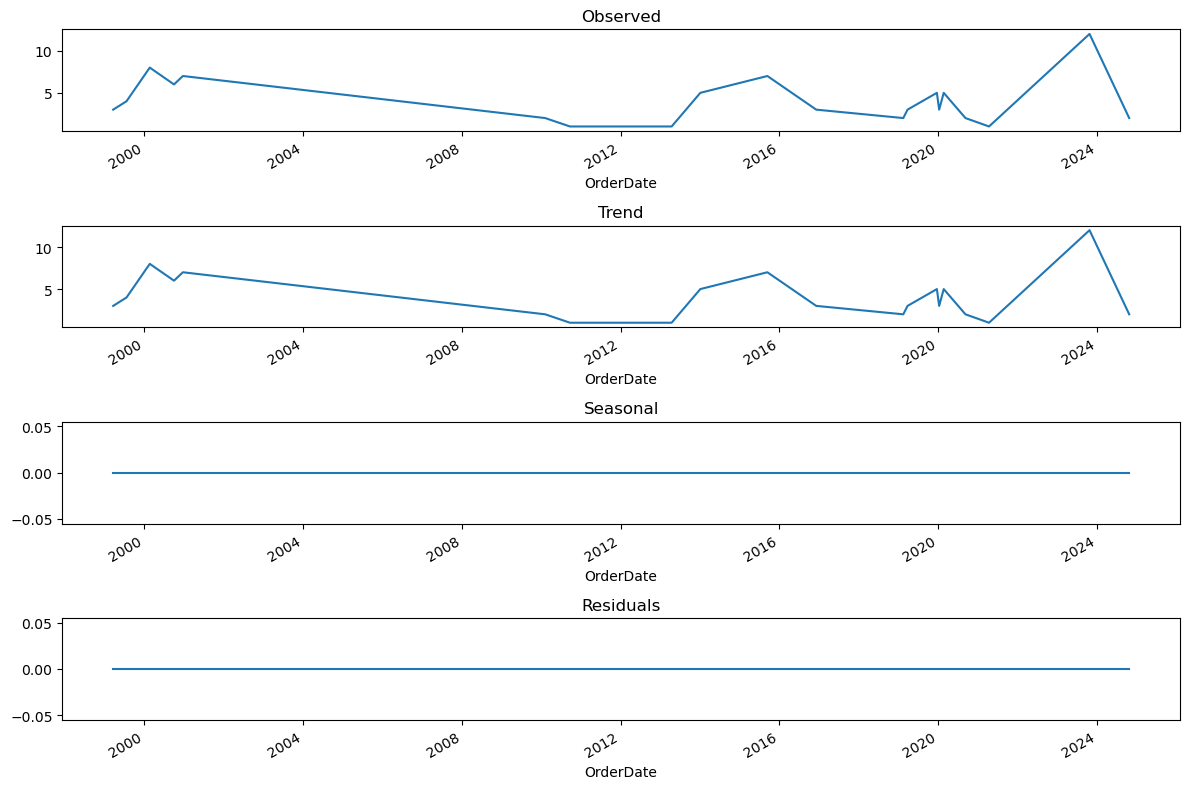

In [150]:

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df1['Quantity'], model='additive', period = 1)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
ax1.set_title('Observed')
decomposition.observed.plot(ax=ax1)

ax2.set_title('Trend')
decomposition.trend.plot(ax=ax2)

ax3.set_title('Seasonal')
decomposition.seasonal.plot(ax=ax3)

ax4.set_title('Residuals')
decomposition.resid.plot(ax=ax4)

plt.tight_layout()
plt.show()

# 8 exercise

In [151]:
min_value = df3['Salary'].min()
max_value = df3['Salary'].max()
df3['Normalized_data'] = (df3['Salary'] - min_value) / (max_value - min_value)

df3['Z-Score'] = (df3['Salary'] - df3['Salary'].mean()) / df3['Salary'].std()
significant_outliers = df3[(df3['Z-Score'] > 2) | (df3['Z-Score'] < -2)]
df3

,EmployeeID,Department,Salary,PerformanceScore,Normalized_data,Z-Score
0,1,Marketing,1242,70,0.044832,-1.460792
1,2,Human Resources,2312,73,0.489000,0.036308
2,3,Sales,2575,24,0.598174,0.404287
3,4,Accounting,3421,65,0.949357,1.587976
4,5,Human Resources,2124,74,0.410959,-0.226734
5,6,Human Resources,2423,84,0.535077,0.191615
6,7,Marketing,1421,100,0.119137,-1.210343
7,8,Finance,2131,23,0.413865,-0.216940
8,9,Sales,2543,65,0.584890,0.359514
9,10,Sales,2586,23,0.602740,0.419678


# 9 exercise

In [152]:
data = {
    'EmployeeID': range(1, 21),  
    'CommissionRate': [0.05, 0.03, 0.06, 0.04, 0.05, 0.03, 0.04, 0.06, 0.05, 0.04,
                       0.05, 0.03, 0.04, 0.06, 0.05, 0.03, 0.05, 0.04, 0.06, 0.03]
}

commission_rates_df = pd.DataFrame(data)

combined_data = pd.merge(df1, df4, on='ProductID', how='inner')

combined_data = pd.concat([combined_data, df3], axis=1)

combined_data = pd.merge(combined_data, commission_rates_df, on='EmployeeID', how='left')

combined_data['Commission'] = combined_data['PricePerUnit'] * combined_data['Quantity'] * combined_data['CommissionRate']

employee_commissions = combined_data.groupby('EmployeeID')['Commission'].sum().reset_index()
employee_commissions

,EmployeeID,Commission
0,1,1.0
1,2,0.9
2,3,1.8
3,4,4.8
4,5,10.0
5,6,3.0
6,7,6.0
7,8,1.2
8,9,17.5
9,10,5.6
